# Lab One: Visualization and Data Preprocessing

Matt Farrow, Amber Clark, Blake Freeman, Megan Ball

## 2015 Flight Delays and Cancellations
Data Source: [Kaggle](https://www.kaggle.com/usdot/flight-delays?select=flights.csv)

### Business Understanding

Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? How would you measure the effectiveness of a good prediction algorithm? Be specific.

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#force import the times as strings to keep leading zeroes. Later on will need to convert to time
dtype_t = {'SCHEDULED_DEPARTURE': str,
           'DEPARTURE_TIME': str,
           'WHEELS_OFF': str,
           'SCHEDULED_TIME': str,
           'WHEELS_ON': str,
           'SCHEDULED_ARRIVAL': str,
          'ARRIVAL_TIME': str,
          }

# Read in the data using Pandas
airlines = pd.read_csv('../Data/airlines.csv')
airports = pd.read_csv('../Data/airports.csv')
flights  = pd.read_csv('../Data/flights.csv', dtype = dtype_t)

C:\Users\blake\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
airlines.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [4]:
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [5]:
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,0005,...,0408,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,0010,...,0741,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,0020,...,0811,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,0020,...,0756,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,0025,...,0259,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#rename columns in preparation for merge
airlines.rename(columns={'IATA_CODE': 'AIRLINE_CODE'}, inplace=True)
flights.rename(columns={'AIRLINE': 'AIRLINE_CODE'}, inplace=True)

In [7]:
# Merge data together
df = pd.merge(flights, airlines, on='AIRLINE_CODE', how = 'left')

In [8]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_CODE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,0005,...,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,0010,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.
2,2015,1,1,4,US,840,N171US,SFO,CLT,0020,...,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,US Airways Inc.
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,0020,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,0025,...,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.


### Data Meaning Type

Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5819079 entries, 0 to 5819078
Data columns (total 32 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE_CODE         object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  object 
 10  DEPARTURE_TIME       object 
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           object 
 14  SCHEDULED_TIME       object 
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            object 
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    object 
 21  ARRIVAL_TIME         object 
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [10]:
#convert from string to time here

In [11]:
df[["SCHEDULED_DEPARTURE", 
   "DEPARTURE_TIME", 
   "WHEELS_OFF", 
   "SCHEDULED_TIME", 
   "WHEELS_ON", 
   "SCHEDULED_ARRIVAL", 
   "ARRIVAL_TIME"]].head()

,SCHEDULED_DEPARTURE,DEPARTURE_TIME,WHEELS_OFF,SCHEDULED_TIME,WHEELS_ON,SCHEDULED_ARRIVAL,ARRIVAL_TIME
0,0005,2354,0015,205,0404,0430,0408
1,0010,0002,0014,280,0737,0750,0741
2,0020,0018,0034,286,0800,0806,0811
3,0020,0015,0030,285,0748,0805,0756
4,0025,0024,0035,235,0254,0320,0259


In [13]:
#create dataframe with just cancelled flights
cancel = df[df.CANCELLED == 1]
cancel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89884 entries, 32 to 5818843
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 89884 non-null  int64  
 1   MONTH                89884 non-null  int64  
 2   DAY                  89884 non-null  int64  
 3   DAY_OF_WEEK          89884 non-null  int64  
 4   AIRLINE_CODE         89884 non-null  object 
 5   FLIGHT_NUMBER        89884 non-null  int64  
 6   TAIL_NUMBER          75163 non-null  object 
 7   ORIGIN_AIRPORT       89884 non-null  object 
 8   DESTINATION_AIRPORT  89884 non-null  object 
 9   SCHEDULED_DEPARTURE  89884 non-null  object 
 10  DEPARTURE_TIME       3731 non-null   object 
 11  DEPARTURE_DELAY      3731 non-null   float64
 12  TAXI_OUT             837 non-null    float64
 13  WHEELS_OFF           837 non-null    object 
 14  SCHEDULED_TIME       89879 non-null  object 
 15  ELAPSED_TIME         0 non-null  

In [14]:
cancel[cancel.DEPARTURE_DELAY >= 0]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_CODE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE
4391,2015,1,1,4,MQ,2758,N939MQ,ROW,DFW,1110,...,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN,American Eagle Airlines Inc.
7441,2015,1,1,4,EV,4264,N27962,STL,IAH,1423,...,NaN,0,1,C,NaN,NaN,NaN,NaN,NaN,Atlantic Southeast Airlines
8516,2015,1,1,4,EV,4707,N11526,IAH,HRL,1530,...,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN,Atlantic Southeast Airlines
10454,2015,1,1,4,MQ,3240,N925MQ,PIA,DFW,1735,...,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN,American Eagle Airlines Inc.
13560,2015,1,1,4,EV,5968,N11109,DEN,ELP,2157,...,NaN,0,1,C,NaN,NaN,NaN,NaN,NaN,Atlantic Southeast Airlines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5805010,2015,12,30,3,EV,4620,N14998,IAH,AMA,2125,...,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN,Atlantic Southeast Airlines
5805188,2015,12,30,3,EV,2857,N626AE,DFW,BRO,2150,...,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN,Atlantic Southeast Airlines
5805202,2015,12,30,3,WN,151,N924WN,DAL,AMA,2150,...,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN,Southwest Airlines Co.
5815567,2015,12,31,4,WN,1754,N515SW,AUS,LBB,1605,...,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN,Southwest Airlines Co.


In [15]:
cancel.groupby('CANCELLATION_REASON')['YEAR'].count()

CANCELLATION_REASON
A    25262
B    48851
C    15749
D       22
Name: YEAR, dtype: int64

### Data Quality

Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Give justifications for your methods.

In [16]:
# How many missing values are there in the data?
df.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE_CODE                 0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
AIRLINE                      0
dtype: i

In [17]:
#how many total flights are cancelled
sum(df.CANCELLED)


89884

In [18]:
#create dataframe with just cancelled flights
cancel = df[df.CANCELLED == 1]
cancel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89884 entries, 32 to 5818843
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 89884 non-null  int64  
 1   MONTH                89884 non-null  int64  
 2   DAY                  89884 non-null  int64  
 3   DAY_OF_WEEK          89884 non-null  int64  
 4   AIRLINE_CODE         89884 non-null  object 
 5   FLIGHT_NUMBER        89884 non-null  int64  
 6   TAIL_NUMBER          75163 non-null  object 
 7   ORIGIN_AIRPORT       89884 non-null  object 
 8   DESTINATION_AIRPORT  89884 non-null  object 
 9   SCHEDULED_DEPARTURE  89884 non-null  object 
 10  DEPARTURE_TIME       3731 non-null   object 
 11  DEPARTURE_DELAY      3731 non-null   float64
 12  TAXI_OUT             837 non-null    float64
 13  WHEELS_OFF           837 non-null    object 
 14  SCHEDULED_TIME       89879 non-null  object 
 15  ELAPSED_TIME         0 non-null  

In [19]:
#find the non-null Departure Time/Delay columns
cancel[cancel.DEPARTURE_DELAY >= 0]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_CODE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE
4391,2015,1,1,4,MQ,2758,N939MQ,ROW,DFW,1110,...,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN,American Eagle Airlines Inc.
7441,2015,1,1,4,EV,4264,N27962,STL,IAH,1423,...,NaN,0,1,C,NaN,NaN,NaN,NaN,NaN,Atlantic Southeast Airlines
8516,2015,1,1,4,EV,4707,N11526,IAH,HRL,1530,...,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN,Atlantic Southeast Airlines
10454,2015,1,1,4,MQ,3240,N925MQ,PIA,DFW,1735,...,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN,American Eagle Airlines Inc.
13560,2015,1,1,4,EV,5968,N11109,DEN,ELP,2157,...,NaN,0,1,C,NaN,NaN,NaN,NaN,NaN,Atlantic Southeast Airlines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5805010,2015,12,30,3,EV,4620,N14998,IAH,AMA,2125,...,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN,Atlantic Southeast Airlines
5805188,2015,12,30,3,EV,2857,N626AE,DFW,BRO,2150,...,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN,Atlantic Southeast Airlines
5805202,2015,12,30,3,WN,151,N924WN,DAL,AMA,2150,...,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN,Southwest Airlines Co.
5815567,2015,12,31,4,WN,1754,N515SW,AUS,LBB,1605,...,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN,Southwest Airlines Co.


In [20]:
# Summary of cancellation reasons in the cancel data set
# A - Airline/Carrier; B - Weather; C - National Air System; D - Security
cancel.groupby('CANCELLATION_REASON')['YEAR'].count()

CANCELLATION_REASON
A    25262
B    48851
C    15749
D       22
Name: YEAR, dtype: int64

In [21]:
#how many flights that are cancelled by the AIRLINE null values for departure time (and therefore all subsequent times)?
a_cancel = cancel[cancel.CANCELLATION_REASON == 'A']
a_cancel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25262 entries, 32 to 5818843
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 25262 non-null  int64  
 1   MONTH                25262 non-null  int64  
 2   DAY                  25262 non-null  int64  
 3   DAY_OF_WEEK          25262 non-null  int64  
 4   AIRLINE_CODE         25262 non-null  object 
 5   FLIGHT_NUMBER        25262 non-null  int64  
 6   TAIL_NUMBER          20241 non-null  object 
 7   ORIGIN_AIRPORT       25262 non-null  object 
 8   DESTINATION_AIRPORT  25262 non-null  object 
 9   SCHEDULED_DEPARTURE  25262 non-null  object 
 10  DEPARTURE_TIME       1588 non-null   object 
 11  DEPARTURE_DELAY      1588 non-null   float64
 12  TAXI_OUT             290 non-null    float64
 13  WHEELS_OFF           290 non-null    object 
 14  SCHEDULED_TIME       25262 non-null  object 
 15  ELAPSED_TIME         0 non-null  

In [22]:
b_cancel = cancel[cancel.CANCELLATION_REASON == 'B']
b_cancel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48851 entries, 42 to 5817980
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 48851 non-null  int64  
 1   MONTH                48851 non-null  int64  
 2   DAY                  48851 non-null  int64  
 3   DAY_OF_WEEK          48851 non-null  int64  
 4   AIRLINE_CODE         48851 non-null  object 
 5   FLIGHT_NUMBER        48851 non-null  int64  
 6   TAIL_NUMBER          40531 non-null  object 
 7   ORIGIN_AIRPORT       48851 non-null  object 
 8   DESTINATION_AIRPORT  48851 non-null  object 
 9   SCHEDULED_DEPARTURE  48851 non-null  object 
 10  DEPARTURE_TIME       1706 non-null   object 
 11  DEPARTURE_DELAY      1706 non-null   float64
 12  TAXI_OUT             495 non-null    float64
 13  WHEELS_OFF           495 non-null    object 
 14  SCHEDULED_TIME       48847 non-null  object 
 15  ELAPSED_TIME         0 non-null  

In [23]:
#create copy for new version of data with modified values for missing data
df_clean = df

#update missing values in times to 0. will be updating times to a binary (1 = yes action happened, 0 = no action happened)
df_clean['DEPARTURE_TIME'] = df_clean['DEPARTURE_TIME'].fillna("F")
#change all non-null values to 1
df_clean.loc[(df_clean.DEPARTURE_TIME != '0'), 'DEPARTURE_TIME'] = 1

#change column name to 'DEPARTED'
df_clean.rename(columns={'DEPARTURE_TIME': 'DEPARTED'}, inplace=True)

df_clean.isna().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE_CODE                 0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTED                     0
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
AIRLINE                      0
dtype: i

In [24]:
df_clean['CANCELLATION_REASON'] = df_clean['CANCELLATION_REASON'].fillna('D')
cols = ['AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY']
df_clean[cols] = df_clean[cols].fillna(0)
df_clean.isna().sum()

YEAR                        0
MONTH                       0
DAY                         0
DAY_OF_WEEK                 0
AIRLINE_CODE                0
FLIGHT_NUMBER               0
TAIL_NUMBER             14721
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
SCHEDULED_DEPARTURE         0
DEPARTED                    0
DEPARTURE_DELAY         86153
TAXI_OUT                89047
WHEELS_OFF              89047
SCHEDULED_TIME              6
ELAPSED_TIME           105071
AIR_TIME               105071
DISTANCE                    0
WHEELS_ON               92513
TAXI_IN                 92513
SCHEDULED_ARRIVAL           0
ARRIVAL_TIME            92513
ARRIVAL_DELAY          105071
DIVERTED                    0
CANCELLED                   0
CANCELLATION_REASON         0
AIR_SYSTEM_DELAY            0
SECURITY_DELAY              0
AIRLINE_DELAY               0
LATE_AIRCRAFT_DELAY         0
WEATHER_DELAY               0
AIRLINE                     0
dtype: int64

In [25]:
#change remaining null values to 0 if flight was cancelled
df_clean.loc[(df_clean.CANCELLED == 1), ('DEPARTURE_DELAY', 'TAXI_OUT', 'ELAPSED_TIME','AIR_TIME','TAXI_IN','ARRIVAL_DELAY')] = 0
df_clean.isna().sum()

YEAR                       0
MONTH                      0
DAY                        0
DAY_OF_WEEK                0
AIRLINE_CODE               0
FLIGHT_NUMBER              0
TAIL_NUMBER            14721
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTED                   0
DEPARTURE_DELAY            0
TAXI_OUT                   0
WHEELS_OFF             89047
SCHEDULED_TIME             6
ELAPSED_TIME           15187
AIR_TIME               15187
DISTANCE                   0
WHEELS_ON              92513
TAXI_IN                 2629
SCHEDULED_ARRIVAL          0
ARRIVAL_TIME           92513
ARRIVAL_DELAY          15187
DIVERTED                   0
CANCELLED                  0
CANCELLATION_REASON        0
AIR_SYSTEM_DELAY           0
SECURITY_DELAY             0
AIRLINE_DELAY              0
LATE_AIRCRAFT_DELAY        0
WEATHER_DELAY              0
AIRLINE                    0
dtype: int64

There are millions of missing values in the cancellation reason and the specific delay time columns. This is expected, as not every flight is cancelled or delayed, and you would hope that percentage would be small of the overall flights. It may make sense to change this to 0 instead of a missing value.

In [30]:
df_clean['DEPARTURE_DELAY'].describe()

count    5.819079e+06
mean     9.194586e+00
std      3.672371e+01
min     -8.200000e+01
25%     -5.000000e+00
50%     -1.000000e+00
75%      7.000000e+00
max      1.988000e+03
Name: DEPARTURE_DELAY, dtype: float64

In [31]:
df_clean['ARRIVAL_DELAY'].describe()

count    5.803892e+06
mean     4.338806e+00
std      3.896982e+01
min     -8.700000e+01
25%     -1.300000e+01
50%     -5.000000e+00
75%      7.000000e+00
max      1.971000e+03
Name: ARRIVAL_DELAY, dtype: float64

In [33]:
DDbins = [-9,0,10,60,99999]
category = ['Early Departure','No Delay to 10 Mins','10 Mins to Hour','Greater than Hour']
df_clean['Departure_D_Binning'] = pd.cut(df["DEPARTURE_DELAY"],DDbins,labels = category)



In [36]:
df_DD_count = df_clean[['Departure_D_Binning','DAY']]

In [37]:
df_DD_count.groupby(['Departure_D_Binning']).count()

,DAY
Departure_D_Binning,
Early Departure,3319806
No Delay to 10 Mins,885601
10 Mins to Hour,914484
Greater than Hour,322993


In [38]:
LAbins = [-9,0,10,60,99999]
category = ['Early ARRIVAL','On time ARRIVAL to 10 Mins Behind','Late ARRIVAL 10 Mins to Hour','Late ARRIVAL Greater than Hour']
df_clean['ARRIVAL_Binning'] = pd.cut(df["ARRIVAL_DELAY"],LAbins,labels = category)

In [39]:
df_A_count = df_clean[['ARRIVAL_Binning','DAY']]

In [40]:
df_A_count.groupby(['ARRIVAL_Binning']).count()

,DAY
ARRIVAL_Binning,
Early ARRIVAL,1480787
On time ARRIVAL to 10 Mins Behind,829220
Late ARRIVAL 10 Mins to Hour,938584
Late ARRIVAL Greater than Hour,319092


In [46]:
DTbins = [0,5,12,19,24]
category = ['Early Morning','Morning','Afternoon','Night']
df_clean['Departure_Time_Binning'] = pd.cut(df["DEPARTED"],LAbins,labels = category)

In [47]:
df_A_count = df_clean[['Departure_Time_Binning','DAY']]
df_A_count.groupby(['Departure_Time_Binning']).count()

,DAY
Departure_Time_Binning,
Early Morning,0
Morning,5819079
Afternoon,0
Night,0


In [41]:
df_clean.TAIL_NUMBER.unique()


array(['N407AS', 'N3KUAA', 'N171US', ..., 'N7LEAA', 'N850DN', 'N8676A'],
      dtype=object)

In [42]:
T_N = df_clean[['TAIL_NUMBER','DAY']]
T_N.groupby(['TAIL_NUMBER']).count()

,DAY
TAIL_NUMBER,
7819A,615
7820L,181
D942DN,9
N001AA,679
N002AA,721
...,...
N997DL,1495
N998AT,1895
N998DL,1630


The missing rows for departure time and departure delay are trickier. We would not want to skew our results here so based on the fact that there are only about 2% of the values missing here, it would make sense to just remove these values and then re-assess how many missing values are left in the other features. Then there are also some values we could calculate as they are dependent on other variables.

<AxesSubplot:>

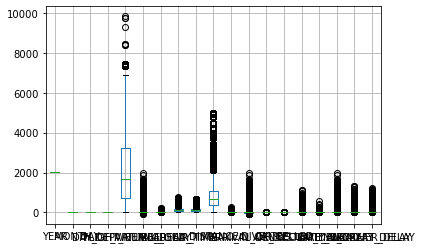

In [44]:
#check for outliers on continuous variables
num_col = df.select_dtypes(include=np.number).columns.tolist() #I got this from here, do we need to credit stack overflow? lol 
#https://stackoverflow.com/questions/25039626/how-do-i-find-numeric-columns-in-pandas
df.boxplot(column=num_col)

Note... need to do some more work here, group at different scales or split out individually

In [45]:
df.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,DEPARTURE_DELAY,TAXI_OUT,ELAPSED_TIME,AIR_TIME,DISTANCE,TAXI_IN,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.803892e+06,5.803892e+06,5.819079e+06,5.816450e+06,5.803892e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,9.194586e+00,1.582288e+01,1.348844e+02,1.117537e+02,8.223565e+02,7.320075e+00,4.338806e+00,2.609863e-03,1.544643e-02,2.463579e+00,1.391715e-02,3.466692e+00,4.289670e+00,5.327704e-01
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,3.672371e+01,9.045315e+00,7.555256e+01,7.302704e+01,6.077843e+02,5.669475e+00,3.896982e+01,5.102012e-02,1.233201e-01,1.305584e+01,9.167865e-01,2.185500e+01,2.057421e+01,8.807465e+00
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.100000e+01,0.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,-5.000000e+00,1.100000e+01,8.100000e+01,5.900000e+01,3.730000e+02,4.000000e+00,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,-1.000000e+00,1.400000e+01,1.170000e+02,9.300000e+01,6.470000e+02,6.000000e+00,-5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,7.000000e+00,1.900000e+01,1.670000e+02,1.430000e+02,1.062000e+03,9.000000e+00,7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,1.988000e+03,2.250000e+02,7.660000e+02,6.900000e+02,4.983000e+03,2.480000e+02,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


In [39]:
df[['AIRLINE_CODE','TAIL_NUMBER','ORIGIN_AIRPORT','DESTINATION_AIRPORT','AIRLINE']] = df[['AIRLINE_CODE','TAIL_NUMBER','ORIGIN_AIRPORT','DESTINATION_AIRPORT','AIRLINE']].astype('str')

In [15]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [37]:
df['AIRLINE_CODE_encode'] = labelencoder.fit_transform(df['AIRLINE_CODE'])
df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_CODE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE,AIRLINE_CODE_encode
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,0005,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.,1
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,0010,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.,0
2,2015,1,1,4,US,840,N171US,SFO,CLT,0020,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,US Airways Inc.,11
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,0020,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.,0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,0025,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,JetBlue Airways,2
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,JetBlue Airways,2
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,JetBlue Airways,2
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,JetBlue Airways,2


In [43]:
df['ORIGIN_AIRPORT_encode'] = labelencoder.fit_transform(df['ORIGIN_AIRPORT'])
df

NameError: name 'labelencoder' is not defined

In [52]:
df2 = df[['ORIGIN_AIRPORT','ORIGIN_AIRPORT_encode']]
df2= df2.drop_duplicates(subset=['ORIGIN_AIRPORT'], keep='last')

In [53]:
df2.rename(columns={'ORIGIN_AIRPORT': 'DESTINATION_AIRPORT'}, inplace=True)
df2.rename(columns={'ORIGIN_AIRPORT_encode': 'DESTINATION_AIRPORT_encode'}, inplace=True)

In [56]:
df = pd.merge(df, df2, on='DESTINATION_AIRPORT', how = 'left')

In [67]:
df.isnull().sum()

YEAR                                0
MONTH                               0
DAY                                 0
DAY_OF_WEEK                         0
AIRLINE_CODE                        0
FLIGHT_NUMBER                       0
TAIL_NUMBER                         0
ORIGIN_AIRPORT                      0
DESTINATION_AIRPORT                 0
SCHEDULED_DEPARTURE                 0
DEPARTURE_TIME                  86153
DEPARTURE_DELAY                 86153
TAXI_OUT                        89047
WHEELS_OFF                      89047
SCHEDULED_TIME                      6
ELAPSED_TIME                   105071
AIR_TIME                       105071
DISTANCE                            0
WHEELS_ON                       92513
TAXI_IN                         92513
SCHEDULED_ARRIVAL                   0
ARRIVAL_TIME                    92513
ARRIVAL_DELAY                  105071
DIVERTED                            0
CANCELLED                           0
CANCELLATION_REASON           5729194
AIR_SYSTEM_D

In [68]:
df.dropna(subset = ["DESTINATION_AIRPORT_encode"], inplace=True)

In [69]:
df['DESTINATION_AIRPORT_encode'].astype('int')

0          583
1          541
2          372
3          509
4          323
          ... 
5819074    345
5819075    554
5819076    591
5819077    591
5819078    348
Name: DESTINATION_AIRPORT_encode, Length: 5819078, dtype: int32

Encoding Catagorical Variables


### Simple Statistics

Visualize appropriate statistics (e.g., range, mode, mean, median, variance, counts) for a subset of attributes. Describe anything meaningful you found from this or if you found something potentially interesting. Note: You can also use data from other sources for comparison. Explain why the statistics run are meaningful. 

### Visualize Attributes

Visualize the most interesting attributes (at least 5 attributes, your opinion on what is interesting). Important: Interpret the implications for each visualization. Explain for each attribute why the chosen visualization is appropriate.

In [74]:
import seaborn as sns

In [75]:
df_small = df[["YEAR","DAY_OF_WEEK","FLIGHT_NUMBER","ORIGIN_AIRPORT_encode","DESTINATION_AIRPORT_encode"]]

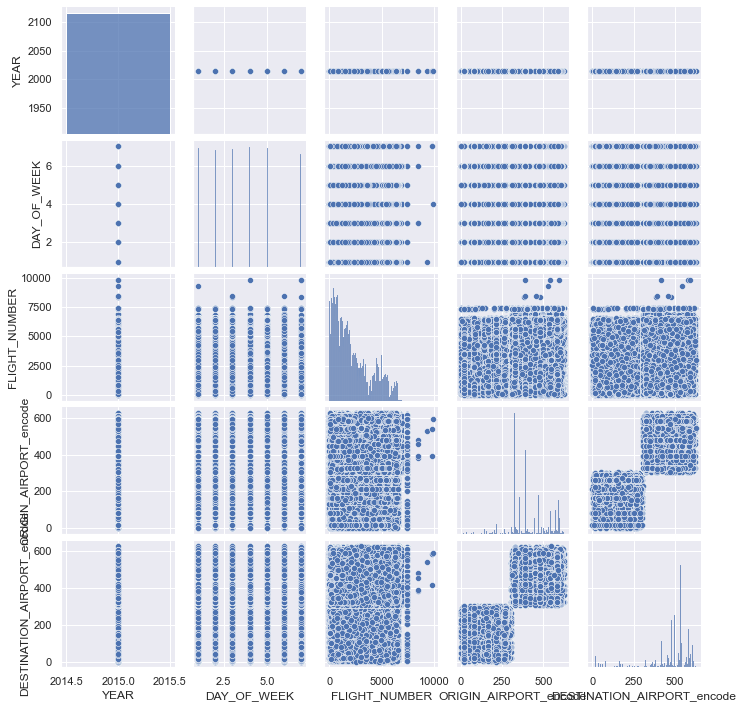

In [78]:
sns.pairplot(df_small, height=2)

### Explore Joint Attributes

Visualize relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.

<AxesSubplot:>

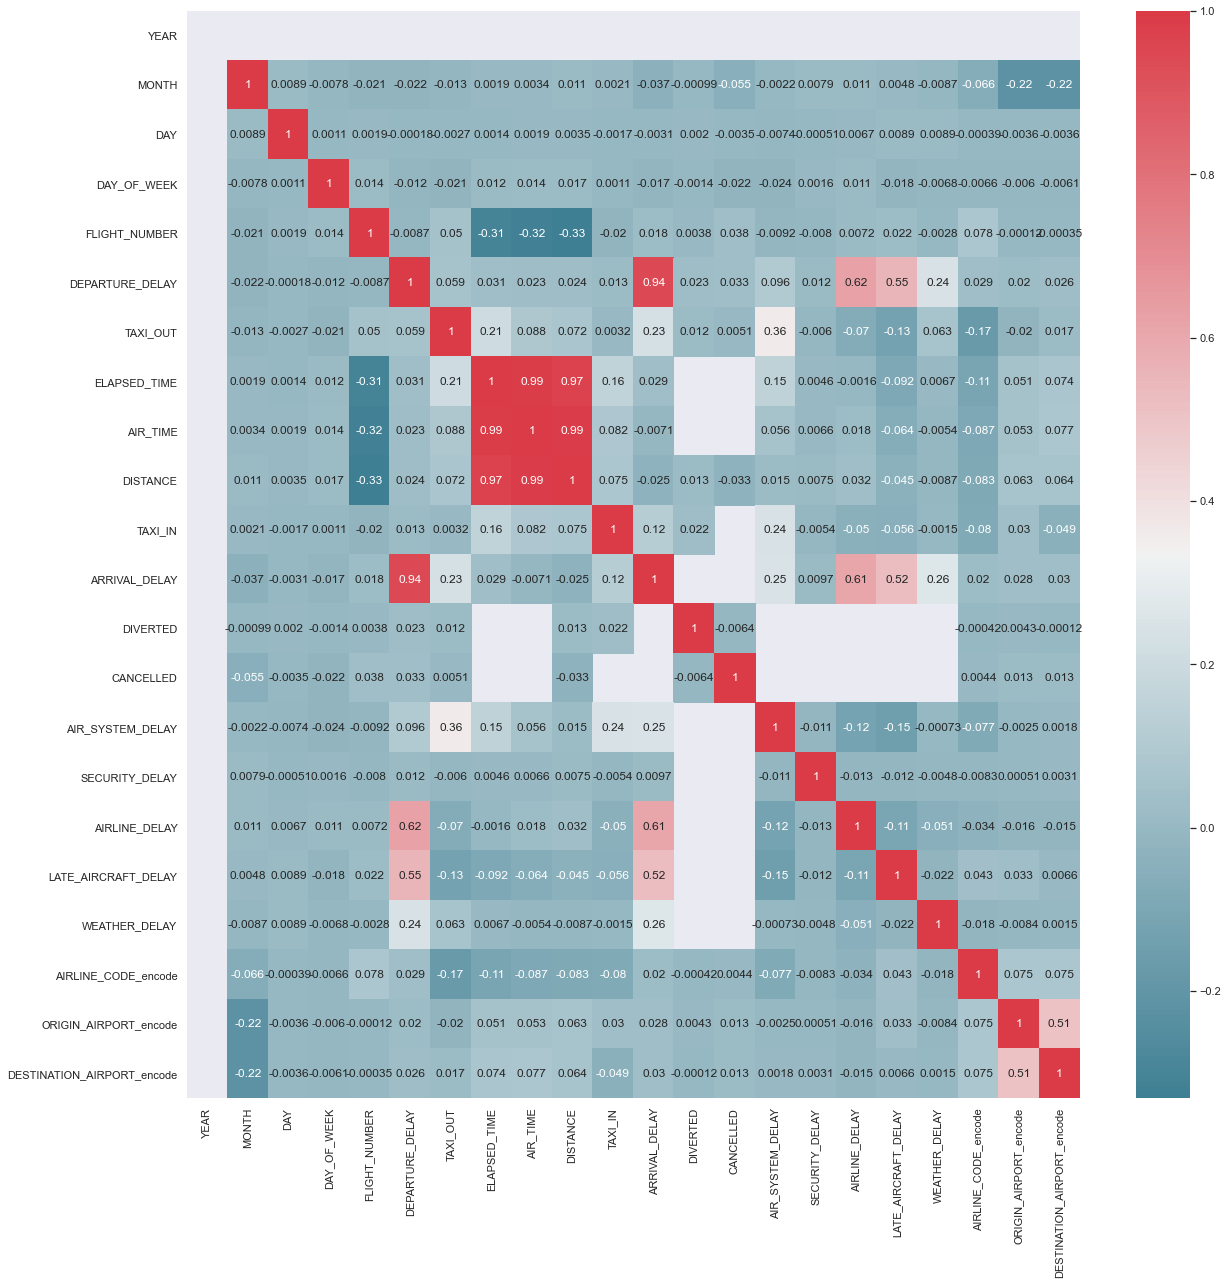

In [71]:
# Examine correlation visually using Seaborn. (Code adapted from 02. Data Visualization.ipynb)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.set(style = "darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize = (20, 20))

sns.heatmap(df.corr(), cmap=cmap, annot = True)

### Explore Attributes and Class

Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).

### New Features 

Are there other features that could be added to the data or created from existing features? Which ones?

### Exceptional Work

You have free reign to provide additional analyses. One idea: implement dimensionality reduction, then visualize and interpret the results. (aka PCA)